# A Quick Guide to Jupyter Notebook with Some Examples

- Jupyter Notebook has 2 types of cells. 
    - Markdown cells, like this one, that is great for documentation
    - Code Cells, where we will be running our code.
- Code Cells can use multiple languages (like R and Python)
    - this example will focus on Python



### In this Demo:

- Time-series Visualization
- Forecasting with Machine Learning
- Genome Modeling

## Jupyter Python Demo using Docline Data

### Time-series Graphs

For the case of this demo, we are looking at some of the DOCLINE data (2023-01-03 to  2023-08-10). Specifically, we are looking at the requests that were created by users during this time. Using that information, we are going to do some machine learning to forecast how many requests we might get in the future.

General Steps:
1. Upload Docline data
2. Clean data and visualize
3. Feed data into an algorithm in order to get a forecast
4. Plot the forecasted data with the original data

In [2]:
#import statements:
import numpy as np #for number cleaning
import pandas as pd #for dataframe configurations


import matplotlib.pyplot as plt #for plotting 
import plotly.express as px #for graphs
import plotly.graph_objects as go #for graphs with dropdown


#import stat package for 
import statsmodels.api as sm

In [16]:
### READING FILES IN AND CLEANING UP THE DATA
#read files in
request_count = pd.read_csv('daily_request.csv')

#should you want to make a csv copy of the cleaned data:
#then you just need to have this csv if you need it
# request_count.to_csv('daily_request.csv', index=False)

#take a peak inside:
request_count.head(3)

,index,date,count,day_of_week
0,155,2023-01-03,1045,Tuesday
1,57,2023-01-04,2347,Wednesday
2,77,2023-01-05,2167,Thursday


In [17]:
#graph to visualize what our counts over time looks like right now:
timeline = go.Figure()
timeline = timeline.add_trace(go.Scatter(x=request_count['date'] ,y=request_count['count'],mode="lines+markers",
                      name="Number of Requests", customdata=request_count['day_of_week']))
timeline.update_traces(hovertemplate="<br>".join([
            'Count: %{y:.2f}',
            'Date: %{x}',
            'Day of the Week: %{customdata}',
        ]),
        )
timeline.update_layout(title="Number of Requests Per Day")
timeline.show()

#fun fact, this graph is interactive. Go ahead and zoom in, hover over points, etc!

### Forecasting Data using ARIMA Model

We will be using ARIMA (autoregressive integrated moving average) method to forecast data. There are others methods from the same statsitical model package, each one with their own unique use-case scenarioes.

For example, the ARIMA Model:

![Arima Model Equation](arima.png)

- Pro:
    - Great for incorporating autocorrelation into the forecast
    - Computes with a moving average (great for seasonal/periodic data)
- Con:
    - not great for forecasting more than 6 months into the future.


Note:
- We will not be using Train/Test method for this algorithm because the dataset is small (218 days for weekly data, about 31 weeks)
- *In this example, we will forecast __15 days__*

In [4]:
#The entire dataset:
model = sm.tsa.arima.ARIMA(request_count["count"], order=(5,1,0)) # order = (lag,differing,moving average)
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                  218
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1784.411
Date:                Mon, 21 Oct 2024   AIC                           3580.822
Time:                        12:06:43   BIC                           3601.101
Sample:                             0   HQIC                          3589.014
                                - 218                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3449      0.054     -6.345      0.000      -0.451      -0.238
ar.L2         -0.6885      0.049    -13.985      0.000      -0.785      -0.592
ar.L3         -0.5204      0.069     -7.596      0.0

### What do these tests mean?

These tests are a general way of seeing how the data sits, if the dataset follows a normal distribution, how the chosen model (ARIMA) fits the data, and if there are any irregularities, how to keep an eye on them when we go into further testing.

- Ljung-Box Q (LBQ) tests the residuals of the ARIMA model, and how far they are from the data. The smaller the number, the higher the liklihood that the model does not show significant lack of fit. (Values less than 0.05 are ideal.)
- Heteroskedasticity tests if the standard deviation of a predicted variable is constant, so the liklihood of errors in the data residuals. If P value is less than 0.05, we can conclude that heteroscedasticity exists.
- Jarque-Bera is a goodness-of-fit test about if the sampled data has skewness and kurtosis matching a normal distribution. Values less than 0.05 indicates that it does not follow a normal distribution.
- Skew shows if the dataset is symmetric. If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
- Kurtosis test shows if the dataset distribution peaks or is more flat. Negative Kurotisis values mean that the data is flatter than normal, while positive shows more peaks. A value of 2+ shows that the distribution is extremely peaked.

In [5]:
#make the forecast:
request_count['forecast']=model_fit.predict(start=90,end=120,dynamic=True) 
#save the forecast into dataframe with date
pred_date=pd.DataFrame(model_fit.predict(start=21,end=35,dynamic=True))
pred_date['date'] = pd.date_range('2023-08-09', periods=15, freq='D')
pred_date['day_of_week'] = pred_date['date'].dt.day_name()


#show on graph
timeline = timeline.add_trace(
    (go.Scatter(x=pred_date['date'], y=pred_date['predicted_mean'], mode="lines+markers",
                 marker=dict(color='purple', ), name="Forecasted Count", customdata=pred_date['day_of_week']
            ,))
)
timeline.update_layout(hovermode="x unified")
timeline.update_traces(hovertemplate="<br>".join([
            'Count: %{y:.2f}',
            'Date: %{x}',
            'Day of the Week: %{customdata}',
        ]),
        )

## E-COLI DATA (with Genome Collection and 3-D Animation)

Collection of genome data (who gets their data from NCBI), and how we measure sequencing data. We can also visualize it in a 3-d view as well (using relevant packages). 


The 3D render of geometric models of DNA, and can also be combined and assembled together. These DNA Models can also provide straight and curved segments for simulation usage. We can use them to break apart models into segments so that we can view them piece-by-piece and also all at once.


### 3-D Visualization of DNA Sequences

DNA can be visualized in many different ways.

- On the NCBI website, there are other uploads of other 3-D models of sequences
    for example: https://www.ncbi.nlm.nih.gov/Structure/mmdb/mmdbsrv.cgi?dps=0&uid=6OQW 

In [25]:
#jupyter notebook configuration settings:
%matplotlib inline
%matplotlib notebook

#this you have to activate in the terminal
#jupyter nbextension install --py mayavi --user

In [19]:
## packages used for this example:

# dna data support
from Bio import SeqIO
from genome_collector import GenomeCollection
import tqdm
from dnachisel import *
from fractaldna.dna_models import dnachain as dna

# some of the 3d visualization support:
from mayavi import mlab
# Disable this option for interactive rendering
mlab.options.offscreen = True
from pathlib import Path
# Enable this option for an interactive notebook
# mlab.init_notebook()

### for our plots and animations:
import pandas as pd
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt

In [5]:
# LOAD THE E. COLI GENOME (DOWNLOAD THE DATA FROM NCBI IF NEEDED)
genome_record = GenomeCollection().get_taxid_biopython_records(taxid=511145)[0]

# COLLECT OPTIMIZED GENE RECORDS
#Minimal cleaning is needed, we just need to get the exact things we are looking for
optimized_records = []
for feature in tqdm.tqdm(genome_record.features):
    if feature.type == "CDS":
        protein_id = feature.qualifiers.get("protein_id", [None])[0]
        if len(feature) % 3 or (protein_id is None):
            continue

        problem = DnaOptimizationProblem(
            sequence=feature.location.extract(genome_record),
            constraints=[
                EnforceTranslation(genetic_table="Bacterial"),
                AvoidPattern("BsaI_site"),
                AvoidPattern("BsmBI_site"),
            ],
            objectives=[CodonOptimize(species="e_coli")],
            logger=None
        )
        problem.resolve_constraints()
        problem.optimize()
        optimized_records.append(problem.to_record(record_id=protein_id))

# EXPORT AS FASTA
SeqIO.write(optimized_records, "optimized_genes.fa", format="fasta")

100%|██████████| 10748/10748 [10:59<00:00, 16.30it/s] 


5067

In [26]:
#for viewing the sequence:
# for seq_record in SeqIO.parse("optimized_genes.fa", "fasta"):
#     print(seq_record.id)
#     print(repr(seq_record.seq))
#     print(len(seq_record))

with open('optimized_genes.fa') as fasta_file:  # Will close handle cleanly
    identifiers = []
    lengths = []
    seq=[]
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(seq_record.id)
        lengths.append(len(seq_record.seq))
        seq.append(str(seq_record.seq))

#stuffing the ecoli data into a dataframe for easier parsing later
sequenceDF = pd.DataFrame()
sequenceDF['identifiers'] = identifiers
sequenceDF['lengths'] = lengths
sequenceDF['seq'] = seq

In [16]:
# getting an idea of what kind of data we're looking at:
print("Minimun value of the lengths: ",sequenceDF.lengths.min())
print("Mean value of the lengths: ",sequenceDF.lengths.mean())
print("Median value of the lengths: ",sequenceDF.lengths.median())
print("Max value of the lengths: ",sequenceDF.lengths.max())

short_seq=pd.DataFrame(sequenceDF.loc[[1703]])
short_seq

Minimun value of the lengths:  45
Mean value of the lengths:  922.6044997039669
Median value of the lengths:  771.0
Max value of the lengths:  15876


,identifiers,lengths,seq
1703,NP_309864.1,45,ATGAAAGCGATTTTTGTGCTGAAAGGCTGGTGGCGCACCAGCTAA


Length of the this sequence is:  45


Text(0.5, 0.92, 'Surface Plot')

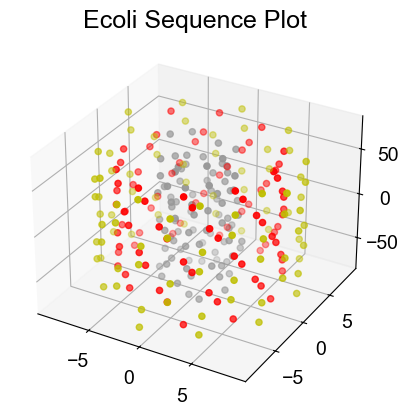

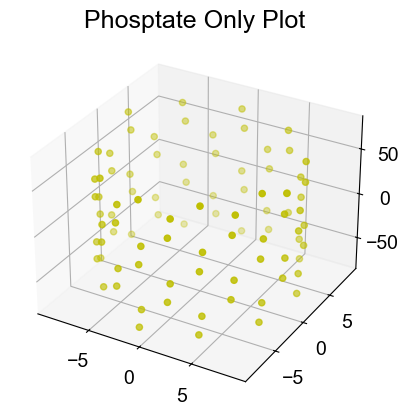

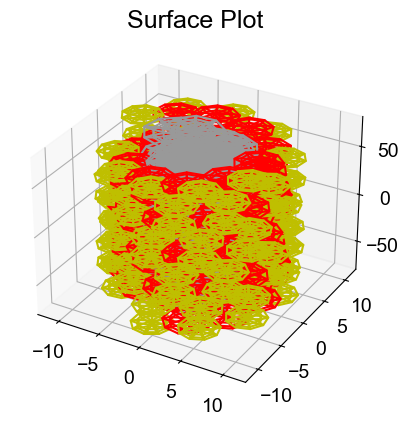

In [ ]:
ecoli_seq = str(seq[1703])
print("Length of the this sequence is: ", len(ecoli_seq))
chain = dna.DNAChain(ecoli_seq)
chain

plot = chain.to_plot()
plot.gca().set_title("Ecoli Sequence Plot")

# You can also hide certain molecules (b = base, s=sugar, p=phosphate)
plot_phosphate = chain.to_plot(plot_b=False, plot_s=False, plot_p=True)
plot_phosphate.gca().set_title("Phosptate Only Plot")

# The surface plot plots each DNA molecule as a ball
plot_surface = chain.to_surface_plot()
plot_surface.gca().set_title("Surface Plot")

In [ ]:
ecoli_seq = str(seq[1])
print("Length of the this sequence is: ", len(ecoli_seq))

Length of the this sequence is:  2463


Text(0.5, 0.92, 'Surface Plot')

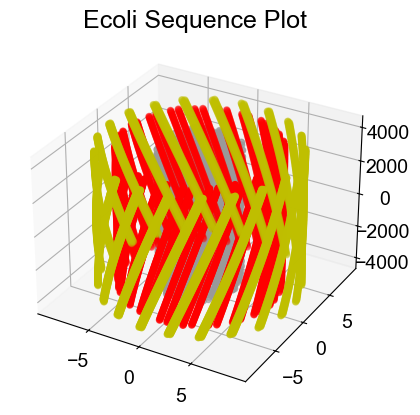

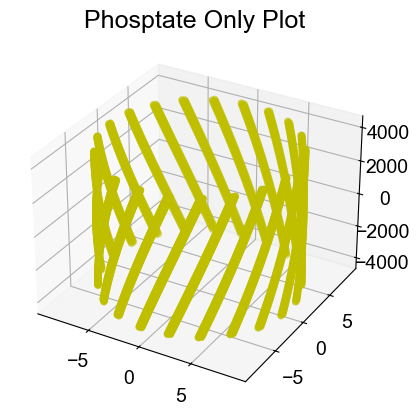

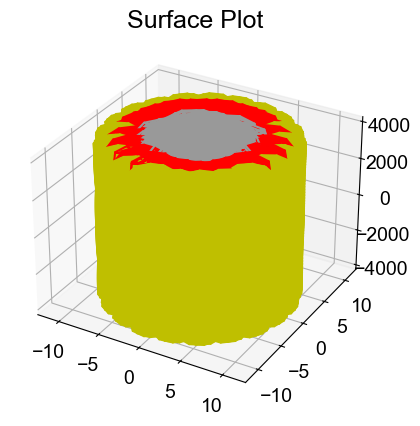

In [ ]:
chain = dna.DNAChain(ecoli_seq)
chain

plot = chain.to_plot()
plot.gca().set_title("Ecoli Sequence Plot")

# You can also hide certain molecules (b = base, s=sugar, p=phosphate)
plot_phosphate = chain.to_plot(plot_b=False, plot_s=False, plot_p=True)
plot_phosphate.gca().set_title("Phosptate Only Plot")

# The surface plot plots each DNA molecule as a ball
plot_surface = chain.to_surface_plot()
plot_surface.gca().set_title("Surface Plot")

In [11]:
#code to get what value segment something is
total_eco = seq[0]
segment_value2 = []
for i in range(len(seq[0])):
    segment_value2.append(0)
for i in range(1,21): #this for-loop runs 20 times  (range(len(seq))) will run the entire, 5066 lines of code (beware, it runs for 2hrs)
    total_eco += seq[i]
    sampling = dna.DNAChain(seq[i])
    sample = sampling.to_frame()
    for j in range(len(sample)):
        # print("i", i, ": j", j)
        segment_value2.append(i)

#moving our previous data into a dataframe for further graphing
total_echo_df = dna.DNAChain(total_eco)
tc = total_echo_df.to_frame()
tc =tc[:len(segment_value2)]

#cleaning up our dataframe for easier animation integration 
# t = np.array([np.ones(1340)*i for i in range(21)]).flatten()
df = pd.DataFrame({"time": segment_value2[:len(tc)] ,"x" : tc['pos_x'], "y" : tc['pos_y'], "z" :tc['pos_z']})


In [12]:
from IPython.display import HTML

def update_graph(num):
    data=df[df['time']==num]
    graph._offsets3d = (data.x, data.y, data.z)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Modeling of EColi Data By Segments')

data=df[df['time']==0]
graph = ax.scatter(data.x, data.y, data.z)

# Setting the Axes properties
ax.set(xlim3d=(-10, 10), xlabel='X')
ax.set(ylim3d=(-10, 10), ylabel='Y')
ax.set(zlim3d=(-35000, 35000), zlabel='Z')

ani = matplotlib.animation.FuncAnimation(fig, update_graph, 21, interval=200, blit=False)
# 21 is the number of frame it's going to read (in this case, rows of data). higher interval value is a slower moving animation

# ani.save('ecolisegments.gif', writer = 'pillow') #if you want to save it as a gif

# plt.show()
# ani
HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>